In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

#spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("parquet/run1008_mwdc.parquet")
df.show(10)
df.select("dc31_x3_id","dc31_x3_charge").show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/15 02:45:04 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/15 02:45:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/15 02:45:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/15 02:45:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
26/01/15 02:45:05 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
26/01/15 02:45:05 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
26/01/15 02:45:05 WARN Utils: Se

+---------+----------+--------------------+--------------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------------+--------------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------+--------------+----------+--------------+--------------+----------+-------+
|hbfNumber|dc31_x1_id|      dc31_x1_timing|      dc31_x1_charge|dc31_x2_id|dc31_x2_timing|dc31_x2_charge|dc31_y1_id|dc31_y1_timing|dc31_y1_charge|dc31_y2_id|dc31_y2_timing|dc31_y2_charge|dc31_x3_id|dc31_x3_timing|dc31_x3_charge|dc31_x4_id|dc31_x4_timing|dc31_x4_charge|dc31_y3_id|dc31_y3_timing|dc31_y3_charge|dc31_y4_id|      dc31_y4_timing|      dc31_y4_charge|dc32_x1_id|dc32_x1_timing|dc32_x1_charge|dc32_x2_id|dc32_x2_timing|dc32_x2_charge|dc32_y1_

Statistics:
[[    0.     0.     0.]
 [    0. 61485.     0.]
 [    0.     0.     0.]]


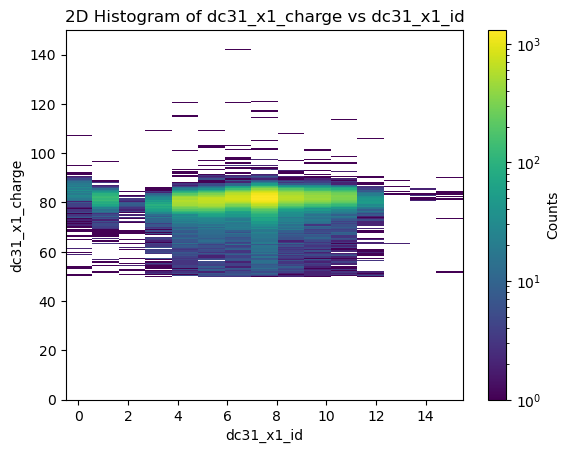

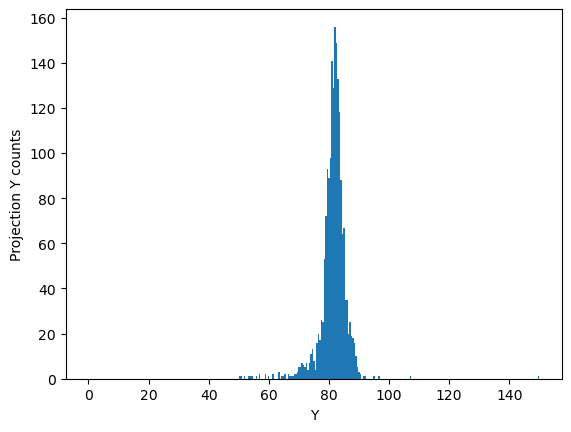

In [4]:

from matplotlib import pyplot as plt
from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm

plane = "dc31_x1"
d, xedges, yedges = Hist2DArrays(df, [f"{plane}_id",f"{plane}_charge"],[16,300],[[-0.5,15.5],[0,150]],  interpolation='none', norm=LogNorm())
plt.show()

from hist.projection import ProjectionY
projH, projXedges = ProjectionY(d, xedges, yedges, 0, 1)
plt.show()

Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [   

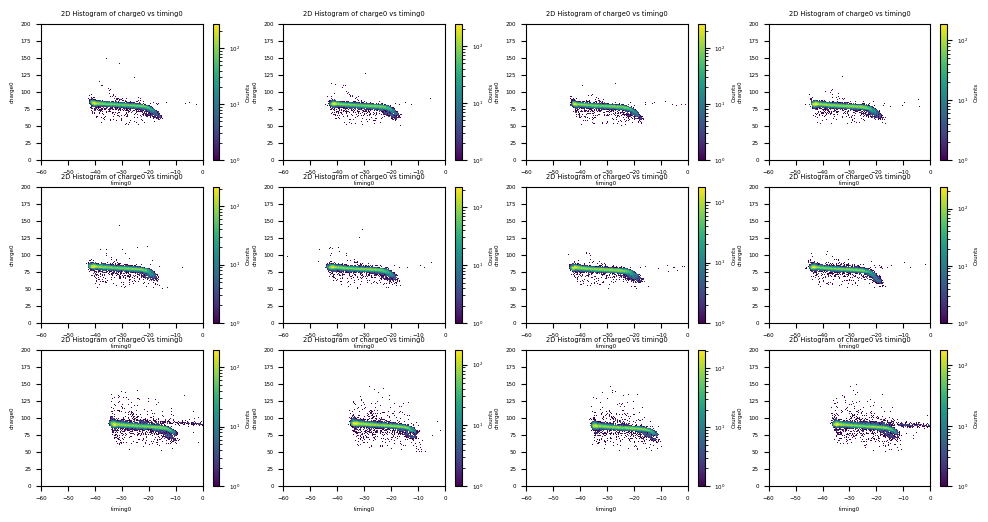

In [6]:
planes = ['dc31_x1','dc31_x2','dc31_y1','dc31_y2','dc31_x3','dc31_x4','dc31_y3','dc31_y4','dc32_x1','dc32_x2','dc32_y1','dc32_y2']

from matplotlib import pyplot as plt
from hist.sparkHist2d import Hist2D
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 4
for i, plane in enumerate(planes):
    q, mod = divmod(i,4)
    plt.subplot2grid((3,4),(q,mod))
    dfp = df.select(f"{plane}_id",f"{plane}_charge",f"{plane}_timing")
    dfp = dfp.withColumn("charge0",F.expr(f"element_at({plane}_charge, 1)")) \
             .withColumn("timing0",F.expr(f"element_at({plane}_timing,1)"))
    d = Hist2D(dfp, ["timing0","charge0"],[300,300],[[-60,0],[0,200]],  interpolation='none', norm=LogNorm())
plt.show()

Statistics:
[[    0.     0.     0.]
 [    0. 61485.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61446.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61456.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61437.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61496.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61400.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61442.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61619.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61886.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 62007.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61864.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 61941.     0.]
 [   

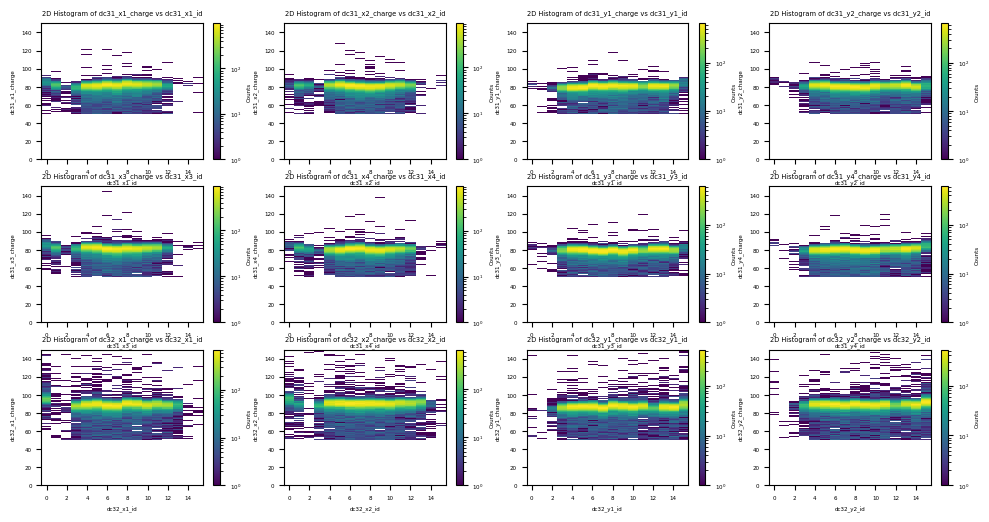

In [7]:
from hist.sparkHist2d import Hist2DArrays

plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 4
for i, plane in enumerate(planes):
    q, mod = divmod(i,4)
    plt.subplot2grid((3,4),(q,mod))
    dfp = df.select(f"{plane}_id",f"{plane}_charge")
    d = Hist2DArrays(dfp, [f"{plane}_id",f"{plane}_charge"],[17,250],[[-0.5,15.5],[0,150]],  interpolation='none', norm=LogNorm())
plt.show()

Statistics:
[[    0.     0.     0.]
 [    0. 57163.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 57176.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 57191.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 57037.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 56293.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 56323.     0.]
 [    0.     0.     0.]]


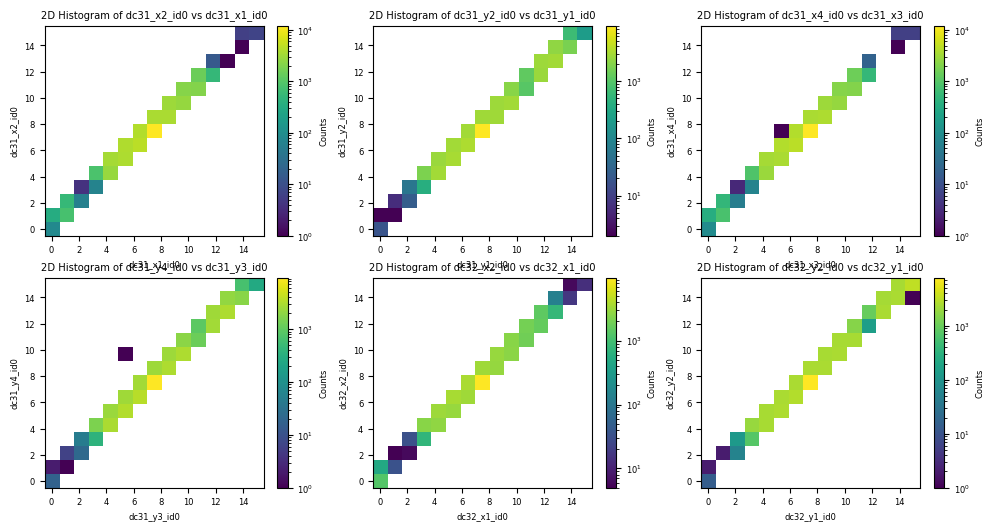

In [8]:
ppaires = [("dc31_x1","dc31_x2"),("dc31_y1","dc31_y2"),("dc31_x3","dc31_x4"),("dc31_y3","dc31_y4"),("dc32_x1","dc32_x2"),("dc32_y1","dc32_y2")]

plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 6
for i, pair in enumerate(ppaires):
    q, mod = divmod(i,3)
    plt.subplot2grid((2,3),(q,mod))
    dfp = df.select(f"{pair[0]}_id",f"{pair[1]}_id").filter(F.expr(f"array_size({pair[0]}_id)==1")).filter(F.expr(f"array_size({pair[1]}_id)==1"))
    dfp = dfp.withColumn(f"{pair[0]}_id0",F.expr(f"element_at({pair[0]}_id, 1)")).withColumn(f"{pair[1]}_id0",F.expr(f"element_at({pair[1]}_id, 1)"))
    d = Hist2D(dfp, [f"{pair[0]}_id0",f"{pair[1]}_id0"],[16,16],[[-0.5,15.5],[-0.5,15.5]],  interpolation='none', norm=LogNorm())
plt.show()

Statistics:
[[0.0000e+00 5.0000e+00 0.0000e+00]
 [0.0000e+00 5.9705e+04 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 5.0000e+00 0.0000e+00]
 [0.0000e+00 5.9705e+04 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 1.0000e+00 0.0000e+00]
 [1.0000e+00 5.9708e+04 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 1.0000e+00 0.0000e+00]
 [0.0000e+00 5.9709e+04 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 3.0000e+00 0.0000e+00]
 [0.0000e+00 5.9707e+04 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 4.0000e+00 0.0000e+00]
 [4.0000e+00 5.9702e+04 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 59710.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.   100.     0.]
 [    0. 59610.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0

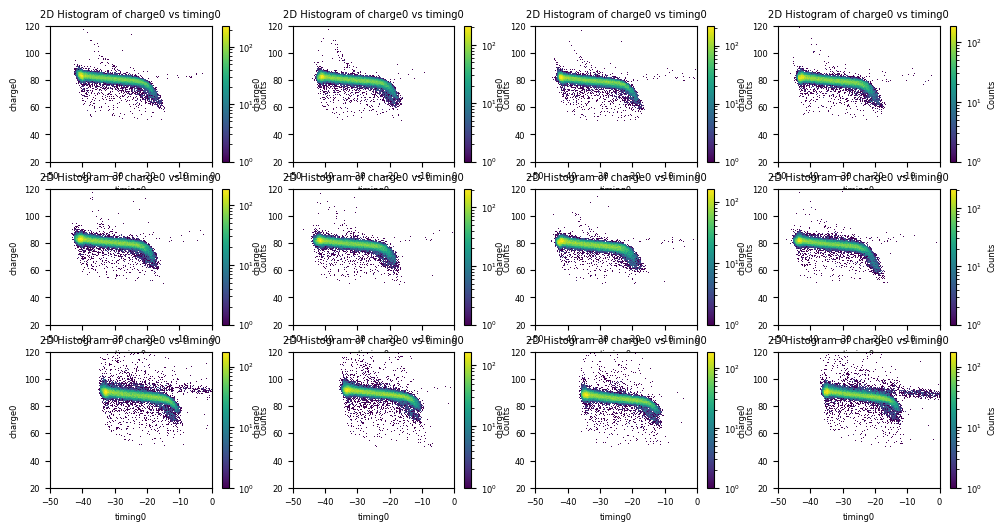

In [11]:
plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 6
for i, plane in enumerate(planes):
    q, mod = divmod(i,4)
    plt.subplot2grid((3,4),(q,mod))
    dfp = df.select(f"{plane}_id",f"{plane}_charge",f"{plane}_timing")
    dfp = dfp.withColumn("charge0",F.expr(f"element_at({plane}_charge, 1)")) \
             .withColumn("timing0",F.expr(f"element_at({plane}_timing,1)"))
    d = Hist2D(dfp, ["timing0","charge0"],[200,200],[[-50,0],[20,120]],  interpolation='none', norm=LogNorm())
plt.show()